<left>
<table style="margin-top:0px; margin-left:0px;">
<tr>
  <td><img src="https://raw.githubusercontent.com/worm-portal/WORM-Figures/master/style/worm.png" alt="WORM" title="WORM" width=50/></td>
  <td><h1 style=font-size:30px>Aqueous Geochemical Speciation</h1><h2>Bonus Features</h2></td>
</tr>
</table>
</left>

In [1]:
import aqequil
ae = aqequil.AqEquil(db="wrm")

Loading a user-supplied thermodynamic database...
data1.wrm is now set as the active thermodynamic database.
This database is meant for rapid calculations between 0 and 350 °C at water saturation pressure.


## Setting basis species in equilibrium with minerals

Instead of measuring the concentration of a dissolved species in a water sample, you might assume that it is in equilibrium with a mineral.

For example, you might assume that the dissolved Ca$^{2+}$ in a sample is set by equilibrium with calcite:

$$\color{orangered}{\mathop{\rm{CaCO_{3(cr)}}}\limits_{(calcite)} + \rm{H^{+}} = \rm{HCO_{3}^{-}} + \rm{Ca^{2+}}}$$

Set a basis species in equilibrium with a mineral by adjusting the sample input CSV file. Take a look inside *singlesample_calcite.csv* to see how the column for Ca$^{2+}$ has been changed to allow equilibrium with calcite. The column subheader has been changed to "Hetero. equil." (short for heterogeneous equilibrium) with the word "calcite" set as the column value.

This input file is speciated as usual with the `speciate` function:

In [2]:
speciation_calcite = ae.speciate(input_filename="singlesample_calcite.csv")

Using wrm to speciate Water Sample (calcite eq.)
Finished!


What is the concentration of calcium, in the form of basis species, that is in the system based on equilibrium with calcite?

In [3]:
speciation_calcite.lookup("Ca+2_total")

Sample,Ca+2_total
,molality
Sample,
Water Sample (calcite eq.),0.000677


And how is that calcium speciated?

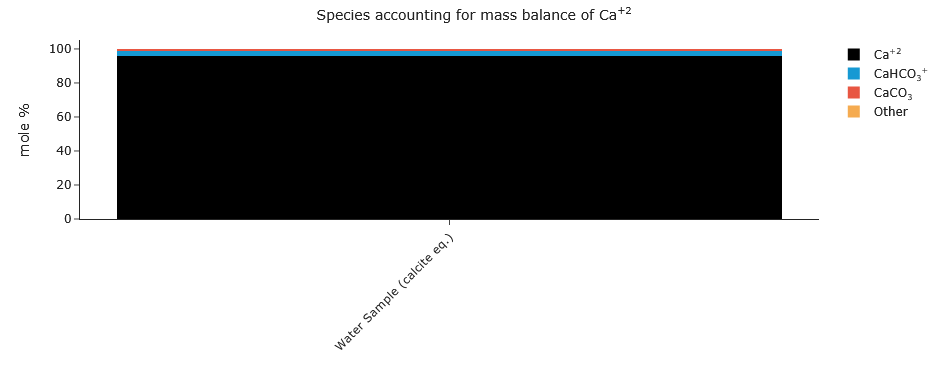

In [4]:
speciation_calcite.plot_mass_contribution("Ca+2")

## Charge Balance

In water, the positive charge of cations must be balanced by the negative charge of anions. Analytical error when measuring concentrations ions in solution can make it appear that cations and anions are out of balance.

The activity of a chosen ion can be allowed to shift to achieve charge balance during a speciation calculation. To do this, set the ion to the `charge_balance_on` option.

This can be useful in a number of situations, like tracking down sources of analytical error and making predictions about the importance of missing water chemistry measurements.

Speciate a water sample and balance charge on pH:

In [5]:
speciation_cbal_pH = ae.speciate(input_filename="singlesample.csv",
                                 charge_balance_on="H+")

Using wrm to speciate Water Sample
Finished!


Speciate again, but this time balance charge on Na$^+$:

In [6]:
# speciate samples and balance charge on Na+
speciation_cbal_Na = ae.speciate(input_filename="singlesample.csv",
                                 charge_balance_on="Na+")

Using wrm to speciate Water Sample
Finished!


Compare the sample that is balanced on pH versus balanced on Na$^+$ with `aqequil.compare`:

In [7]:
comparison = aqequil.compare(speciation_cbal_pH, speciation_cbal_Na)

Visualise the difference in pH between the two speciations with a barplot.

The sample that was balanced on pH is on the right and the sample balanced on Na$^+$ is on the left. Note how the pH had to shift from 7.7 to 9.3 to achieve charge balance.

Do you think it is realistic to assume the pH of the water sample is 9.3, but was inaccurately measured as 7.7? Probably not, unless there was something seriously wrong with the pH meter or its calibration.

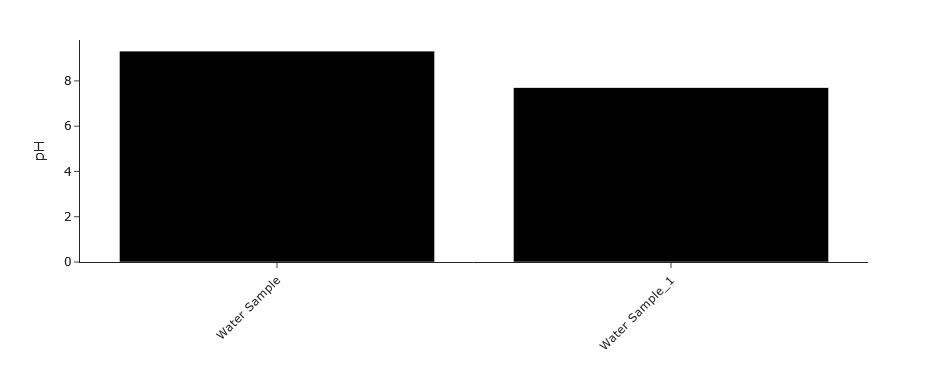

In [8]:
comparison.barplot("pH")

Now visualise the difference in Na$^+$ between the two speciations.

As before, the sample that was balanced on pH is on the right and the sample balanced on Na$^+$ is on the left. This time, the activity of Na+ had to shift to achieve charge balance.

This comparison lends itself to a few questions that might help track down analytical sources of error. How accurately care we able to measure Na$^+$ or other major dissolved ions? Have we missed measuring something important that might fix this apparent imbalance?

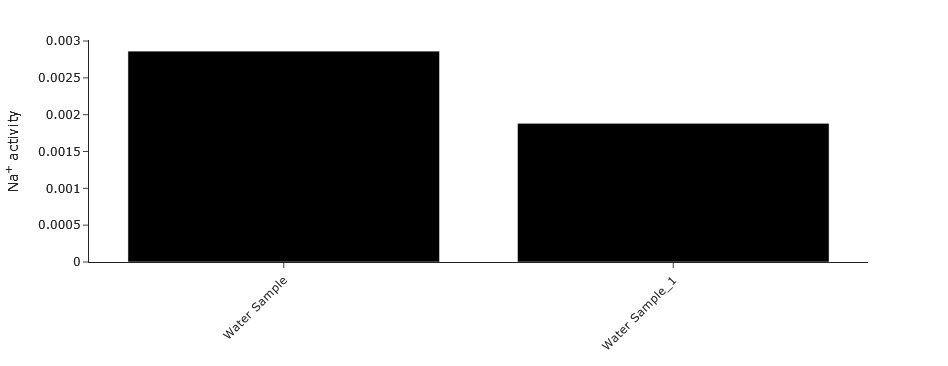

In [9]:
comparison.barplot("Na+")

## Comparing two or more speciations

Several speciations can be compared with lookup and plotting functions. This was demonstrated in the Charge Balance section above, but comparisons actually can handle more than one sample per speciation.

As an example, let's compare samples in *S&C10vents.csv* to *peru.csv* and to *singlesample.csv*.

In [10]:
speciation_SC10 = ae.speciate(input_filename="S&C10vents.csv", exclude=["Year", "Area"])
speciation_peru = ae.speciate(input_filename="peru.csv", exclude=["Year", "Area"])
speciation_sngl = ae.speciate(input_filename="singlesample.csv")

The input file column 'logfO2' will be used to set sample redox state. If a another column is desired, set it manually using the redox_flag parameter.
Using wrm to speciate BSW
Using wrm to speciate Rainbow
Using wrm to speciate Guaymas
Using wrm to speciate Endeavour
Using wrm to speciate Lau
Using wrm to speciate 9N
Using wrm to speciate TAG
Using wrm to speciate Kairei
Finished!
A column to set sample redox state could not be automatically detected in the input file. Valid columns include 'logfO2' (with subheader 'logfO2'), 'O2' (with a valid concentration subheader), 'Eh' (with subheader 'volts'), 'pe' (with subheader 'pe'), and 'O2(g)' (with subheader 'Hetero. equil.'). A default logfO2 value will be used to set sample redox state. It is also possible to set sample redox state based on a valid auxiliary basis species/basis species combo (e.g., Fe+3/Fe+2) by setting the redox_flag parameter to 'redox aux' and the redox_aux parameter to the name of the desired auxiliary basis specie

The `aqequil.compare` function is used join several speciation calculations into one.

In [11]:
comparison = aqequil.compare(speciation_SC10, speciation_peru, speciation_sngl)

Let's visualise pH and temperature values in an interactive scatterplot:

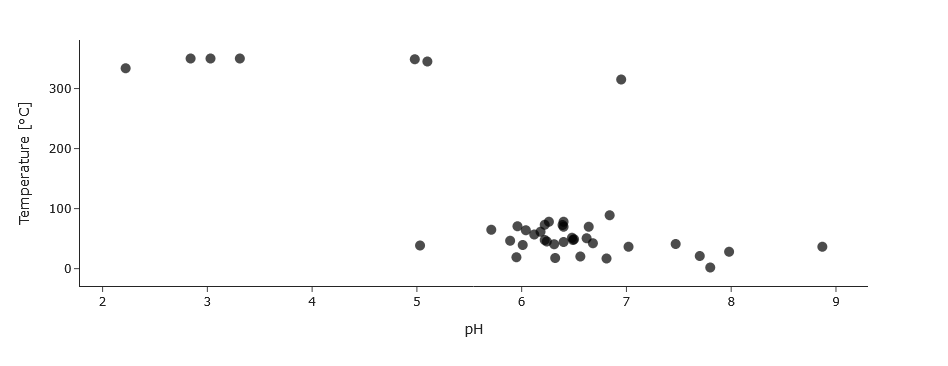

In [12]:
comparison.scatterplot("pH", "Temperature")

Visualise how carbonate species and complexes are distributed across samples:

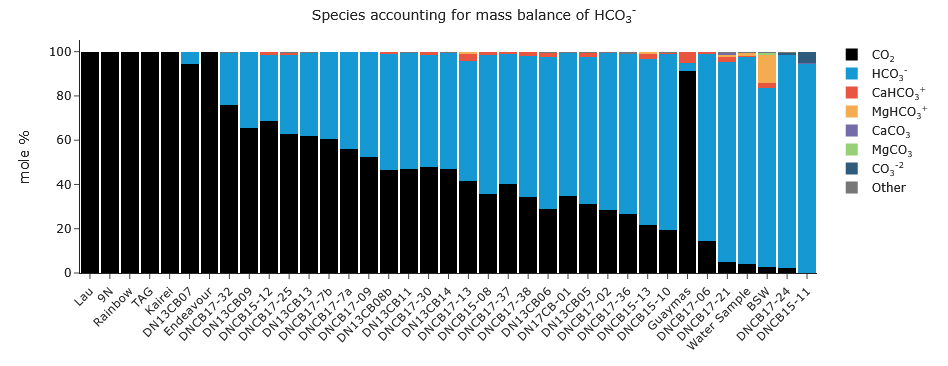

In [13]:
comparison.plot_mass_contribution("HCO3-", sort_by="pH", plot_width=7)

## Changing Pressure

It is possible to specify elevated pressures for a speciation calculation. The steps are:
1. ensure your input file has a column for 'Pressure' with the subheader 'bar'
2. set the thermodynamic database to 'WORM', meant for calculations up to 5kb pressure

Using the CSV form of the database is a little slower, but much more flexible when it comes to calculating samples outside of PSAT.

In this example, every sample is at 200 bars. However, each sample can have a unique pressure value under the Pressure column in the input file.

In [14]:
ae = aqequil.AqEquil(db="WORM")

Loading Water-Organic-Rock-Microbe (WORM) thermodynamic databases...
wrm_data_latest.csv is now set as the active thermodynamic database.
Element database elements.csv is active.
Solid solution database solid_solutions.csv is active.
LogK database wrm_data_logk.csv is active.
LogK_S database wrm_data_logk_s.csv is active.
Loading thermodynamic database into pyCHNOSZ...


In [15]:
speciation_200bar = ae.speciate(input_filename="S&C10vents_200bar.csv",
                                exclude=["Year", "Area"],
                                )

The input file column 'logfO2' will be used to set sample redox state. If a another column is desired, set it manually using the redox_flag parameter.
Getting wrm_data_latest.csv ready. This will take a moment...
Using wrm_data_latest.csv to speciate BSW
Using wrm_data_latest.csv to speciate Rainbow
Using wrm_data_latest.csv to speciate Guaymas
Using wrm_data_latest.csv to speciate Endeavour
Using wrm_data_latest.csv to speciate Lau
Using wrm_data_latest.csv to speciate 9N
Using wrm_data_latest.csv to speciate TAG
Using wrm_data_latest.csv to speciate Kairei
Finished!


In [16]:
speciation_200bar.lookup(["pH", "Temperature", "Pressure", "HCO3-"])

Sample,pH,Temperature,Pressure,HCO3-
,pH,degC,bar,log_activity
Sample,,,,
BSW,7.80,2,200.0,-2.8771
Rainbow,3.03,350,200.0,-8.2626
Guaymas,6.95,315,200.0,-2.8550
Endeavour,5.10,345,200.0,-5.8957
Lau,2.22,334,200.0,-8.4516
9N,2.84,350,200.0,-8.5906
TAG,3.31,350,200.0,-8.6576
Kairei,4.98,349,200.0,-6.7738


## Adding or modifying entries in the thermodynamic database

This will be covered in a future WORM workshop. In brief, it involves changing or adding entries in a CSV table of thermodynamic values and then telling the `speciate` function to use the customized database. An example of compiling a custom database can be found in the demo:

**3-6-3. Create a custom data0 file**

This demo can be created from the WORM-Library.ipynb notebook in your home directory.